In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

#EXPLORATORY DATA ANALYST (EDA)

In [ ]:
drive.mount('/content/drive')
path_data = '/content/drive/My Drive/MSIB/Project_Kelompok/dataset/'
os.listdir(path_data)

Mounted at /content/drive


['dataset.csv',
 'dataset.gsheet',
 'dataset_kurir.csv',
 'data_feature.gsheet',
 'dataset_case5.gsheet',
 'dataset_case5.csv',
 'Data_Feature.csv',
 'temp_data',
 'Data_Feature_Add_Column.csv',
 'data feature.csv']

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv(path_data + 'dataset.csv', parse_dates=['Waktu Pembaruan','Sinkronisasi Terakhir', 'Waktu Pembayaran', 'Waktu Pengiriman', 'Waktu Penyelesaian', 'Kirim Sebelum'])


<ipython-input-3-facc73ba2adb>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(path_data + 'dataset.csv', parse_dates=['Waktu Pembaruan','Sinkronisasi Terakhir', 'Waktu Pembayaran', 'Waktu Pengiriman', 'Waktu Penyelesaian', 'Kirim Sebelum'])
<ipython-input-3-facc73ba2adb>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(path_data + 'dataset.csv', parse_dates=['Waktu Pembaruan','Sinkronisasi Terakhir', 'Waktu Pembayaran', 'Waktu Pengiriman', 'Waktu Penyelesaian', 'Kirim Sebelum'])
<ipython-input-3-facc73ba2adb>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(path_data + 'd

In [ ]:
df.head()

,NO.,Biaya Kartu Kredit,Waktu Pembaruan,Sinkronisasi Terakhir,Adalah Pesanan Palsu,Tanggal Pembuatan,Status,Jenis Pesanan,Channel,Nama Toko,Pembayaran,Waktu Pembayaran,Waktu Pengiriman,Waktu Penyelesaian,Catatan Pembeli,Variant Produk,Nama Gudang,Status Produk,Harga Awal Produk,Harga Promosi,Jumlah,Adalah Hadiah,Total Berat(g),Harga Total Promosi,Subtotal,Invoice,Kurir,Provinsi,Kota,Kecamatan,Kirim Sebelum,Mata Uang,Total,Biaya Pengiriman,Biaya Kirim Ditanggung Pembeli,Pajak,Asuransi,Total Diskon,Subsidi Marketplace,Biaya Komisi,Biaya Layanan,Ongkir Dibayar Sistem,Potongan Harga,Potongan Biaya Pengiriman,Koin,Koin Cashback Penjual,Jumlah Pengembalian Dana,Voucher Channel,Diskon Penjual,Biaya Layanan Kartu Kredit,Catatan Penjual,Status Label Pengiriman,Status Invoice,Status Packing List,Alasan Pembatalan,Waktu Pembatalan,SKU_1,SKU_2,SKU_3,SKU_4,SKU_5,SKU_6,Alamat Penerima Encoded,ID Pesanan Hashed
0,1,0.0,2024-05-15 09:32:00,2024-05-15 09:35:00,Tidak,14-05-2024 11:29,Selesai,Pesanan Normal,Toko Ijo,Toko 1,Online Payment,2024-05-14 11:52:00,NaT,2024-05-15 09:32:00,NaN,COMBO (500ML+330ML),DefaultWarehouse,Selesai,989800.0,890820.0,1,Tidak,650.0,890820,890820.0,NaN,Kurir 1,JAWA BARAT,KOTA DEPOK,BEJI,2024-05-14 23:59:00,IDR,829152.0,0.0,29500.0,0.0,0.0,0.0,0.0,-35633.0,-26035.0,-29500.0,0.0,20000.0,0.0,0.0,0.0,89082.0,0.0,0.0,NaN,Belum Dicetak,Belum Dicetak,Belum Dicetak,NaN,NaN,103,105.0,NaN,NaN,NaN,NaN,987,747909763bd0341883eb2726872231248ee39bdf9d6fbf...
1,2,0.0,2024-05-14 17:45:00,2024-05-14 13:09:00,Tidak,14-05-2024 10:19,Selesai,Pesanan Normal,Toko Biru,Toko 2,Bank 1,2024-05-14 10:19:00,NaT,2024-05-15 09:32:00,NaN,1PC,DefaultWarehouse,Selesai,99900.0,99900.0,1,Tidak,250.0,99900,99900.0,INV/20240514/MPL/3903641486,Kurir 3,DKI Jakarta,Kota Administrasi Jakarta Selatan,Kebayoran Lama,2024-05-15 16:00:00,IDR,135800.0,35000.0,0.0,0.0,900.0,23993.0,0.0,0.0,0.0,0.0,0.0,17000.0,0.0,0.0,0.0,6993.0,0.0,0.0,NaN,Belum Dicetak,Belum Dicetak,Belum Dicetak,NaN,NaN,61,NaN,NaN,NaN,NaN,NaN,2941,d85e99b5b5713d2cbdfaba295c3d2041d820a6b01c40bf...
2,3,0.0,2024-05-15 11:07:00,2024-05-15 11:15:00,Tidak,14-05-2024 09:06,Selesai,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 09:06:00,2024-05-14 13:40:00,2024-05-15 11:07:00,NaN,2pcs,DefaultWarehouse,Selesai,79800.0,75012.0,1,Tidak,900.0,75012,274912.0,INV/20240514/MPL/3903641486,Kurir 2,JAWA TIMUR,KAB. SIDOARJO,GEDANGAN,2024-05-14 23:59:00,IDR,235242.0,0.0,0.0,0.0,0.0,10000.0,0.0,-10596.0,-19074.0,0.0,0.0,8000.0,0.0,0.0,0.0,26492.0,10000.0,0.0,NaN,Sedang mencetak,Belum Dicetak,Belum Dicetak,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,2477,0325a079588410476b3ba5a73bd1a7d2814d35f22c5897...
3,3,NaN,2024-05-15 11:07:00,2024-05-15 11:15:00,Tidak,14-05-2024 09:06,Selesai,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 09:06:00,2024-05-14 13:40:00,2024-05-15 11:07:00,NaN,1pc 300ML,DefaultWarehouse,Selesai,199900.0,199900.0,1,Tidak,NaN,199900,NaN,INV/20240514/MPL/3903641486,Kurir 2,JAWA TIMUR,KAB. SIDOARJO,GEDANGAN,2024-05-14 23:59:00,IDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sedang mencetak,Belum Dicetak,Belum Dicetak,NaN,NaN,64,NaN,NaN,NaN,NaN,NaN,2477,0325a079588410476b3ba5a73bd1a7d2814d35f22c5897...
4,4,0.0,2024-05-15 06:05:00,2024-05-15 06:05:00,Tidak,14-05-2024 08:16,Selesai,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 08:16:00,2024-05-14 13:40:00,2024-05-15 06:05:00,NaN,1pc,DefaultWarehouse,Selesai,39900.0,39900.0,1,Tidak,250.0,39900,39900.0,INV/20240514/MPL/3903641486,Kurir 1,JAWA TIMUR,KOTA SURABAYA,TANDES,2024-05-14 23:59:00,IDR,35431.0,0.0,0.0,0.0,0.0,0.0,0.0,-1596.0,-2873.0,0.0,0.0,9000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Belum Dicetak,Belum Dicetak,Belum Dicetak,NaN,NaN,62,NaN,NaN,NaN,NaN,NaN,683,e1749e58062288683656be54ff11cf2ac8212c9ad8e0ba...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829 entries, 0 to 4828
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NO.                             4829 non-null   int64         
 1   Biaya Kartu Kredit              3312 non-null   float64       
 2   Waktu Pembaruan                 4829 non-null   datetime64[ns]
 3   Sinkronisasi Terakhir           4829 non-null   datetime64[ns]
 4   Adalah Pesanan Palsu            4829 non-null   object        
 5   Tanggal Pembuatan               4829 non-null   object        
 6   Status                          4829 non-null   object        
 7   Jenis Pesanan                   4829 non-null   object        
 8   Channel                         4829 non-null   object        
 9   Nama Toko                       4829 non-null   object        
 10  Pembayaran                      4829 non-null   object        
 11  Wakt

In [ ]:
df.isnull().sum()

NO.                                  0
Biaya Kartu Kredit                1517
Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Adalah Pesanan Palsu                 0
Tanggal Pembuatan                    0
Status                               0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     2
Waktu Penyelesaian                   0
Catatan Pembeli                     37
Variant Produk                       0
Nama Gudang                          0
Status Produk                        0
Harga Awal Produk                   35
Harga Promosi                       32
Jumlah                               0
Adalah Hadiah                        0
Total Berat(g)                    1517
Harga Total Promosi                  0
Subtotal                          1517
Invoice                  

In [ ]:
df.describe()

,NO.,Biaya Kartu Kredit,Waktu Pembaruan,Sinkronisasi Terakhir,Waktu Pembayaran,Waktu Pengiriman,Waktu Penyelesaian,Harga Awal Produk,Harga Promosi,Jumlah,Total Berat(g),Harga Total Promosi,Subtotal,Kirim Sebelum,Total,Biaya Pengiriman,Biaya Kirim Ditanggung Pembeli,Pajak,Asuransi,Total Diskon,Subsidi Marketplace,Biaya Komisi,Biaya Layanan,Ongkir Dibayar Sistem,Potongan Harga,Potongan Biaya Pengiriman,Koin,Koin Cashback Penjual,Jumlah Pengembalian Dana,Voucher Channel,Diskon Penjual,Biaya Layanan Kartu Kredit,Catatan Penjual,Waktu Pembatalan,SKU_1,SKU_2,SKU_3,SKU_4,SKU_5,SKU_6,Alamat Penerima Encoded
count,4829.000000,3312.0,4829,4829,4829,4827,4829,4.794000e+03,4.797000e+03,4829.000000,3312.000000,4.829000e+03,3.312000e+03,4829,3.312000e+03,3312.000000,3312.000000,3312.0,3312.000000,3.312000e+03,3312.0,3312.000000,3312.000000,3312.000000,3312.0,3312.000000,3312.000000,3312.0,3312.0,3312.000000,3.312000e+03,3312.0,0.0,0.0,4829.000000,981.000000,207.000000,126.000000,4.0,4.00,4829.000000
mean,1644.739076,0.0,2024-04-03 23:57:15.133568,2024-04-04 03:39:35.845930752,2024-03-30 00:23:57.167115520,2024-04-04 11:26:28.738346752,2024-04-05 06:28:12.337958144,2.379475e+05,1.949630e+05,1.106647,690.570350,2.056060e+05,2.995986e+05,2024-04-01 21:56:08.573203456,2.690407e+05,4166.125302,1986.790761,0.0,307.608696,2.001975e+04,0.0,-11705.947464,-8665.690821,-2031.444444,0.0,16871.062802,2854.043176,0.0,0.0,8340.477657,1.356411e+04,0.0,NaN,NaN,65.043694,90.303772,94.734300,134.492063,92.0,153.25,1480.377097
min,1.000000,0.0,2024-02-15 21:57:00,2024-02-15 15:08:00,2024-02-15 02:37:00,2024-03-14 15:53:00,2024-02-20 15:25:00,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,6.900000e+03,2024-02-16 16:00:00,-5.180000e+04,-35000.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,-193135.000000,-95346.000000,-175000.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000e+00,0.0,NaN,NaN,0.000000,52.000000,59.000000,52.000000,72.0,153.00,0.000000
25%,799.000000,0.0,2024-03-17 02:35:00,2024-03-17 03:54:00,2024-03-11 08:05:00,2024-03-20 14:35:00,2024-03-20 03:53:00,5.990000e+04,5.000000e+04,1.000000,250.000000,5.339200e+04,8.991000e+04,2024-03-13 22:03:00,8.109900e+04,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,-14240.000000,-11768.500000,0.000000,0.0,9000.000000,0.000000,0.0,0.0,0.000000,0.000000e+00,0.0,NaN,NaN,52.000000,62.000000,59.000000,145.000000,72.0,153.00,730.000000
50%,1651.000000,0.0,2024-04-03 15:05:00,2024-04-03 18:21:00,2024-03-29 09:20:00,2024-03-30 16:13:00,2024-04-03 15:05:00,1.207000e+05,9.990000e+04,1.000000,450.000000,1.086300e+05,1.656000e+05,2024-04-02 04:54:00,1.414440e+05,0.000000,0.000000,0.0,0.000000,8.000000e+03,0.0,-5526.500000,-5794.000000,0.000000,0.0,14000.000000,0.000000,0.0,0.0,0.000000,0.000000e+00,0.0,NaN,NaN,61.000000,73.000000,105.000000,145.000000,72.0,153.00,1474.000000
75%,2479.000000,0.0,2024-04-23 22:00:00,2024-04-22 09:43:00,2024-04-19 10:13:00,2024-04-20 14:55:00,2024-04-23 22:58:00,1.998000e+05,1.838160e+05,1.000000,850.000000,1.878120e+05,3.085300e+05,2024-04-22 23:30:00,2.667502e+05,0.000000,0.000000,0.0,0.000000,1.472850e+04,0.0,-1436.000000,-1771.500000,0.000000,0.0,20000.000000,0.000000,0.0,0.0,9990.000000,1.000000e+04,0.0,NaN,NaN,76.000000,107.000000,112.000000,145.000000,92.0,153.25,2231.000000
max,3313.000000,0.0,2024-05-15 13:09:00,2024-05-15 12:46:00,2024-05-14 11:52:00,2024-05-14 13:40:00,2024-05-15 12:35:00,5.499999e+06,5.499999e+06,60.000000,10575.000000,5.499999e+06,5.499999e+06,2024-06-26 10:51:00,5.506999e+06,130800.000000,175000.000000,0.0,23200.000000,1.980000e+06,0.0,0.000000,0.000000,0.000000,0.0,130800.000000,335855.000000,0.0,0.0,288889.000000,1.980000e+06,0.0,NaN,NaN,142.000000,148.000000,150.000000,151.000000,152.0,154.00,2999.000000
std,956.319890,0.0,NaN,NaN,NaN,NaN,NaN,4.079388e+05,3.690355e+05,0.945060,942.898524,3.735183e+05,4.717736e+05,NaN,4.586806e+05,11291.118279,7732.291009,0.0,1463.205034,9.708864e+04,0.0,18486.404609,10260.866271,7805.711082,0.0,12966.854731,13643

In [ ]:
# df['ID Pesanan Hashed'].value_counts()

#FEATURE ENGINEERING
(Drop Kolom yang sekiranya ga terpakai karna berbagai alasan)

***Kolom Yang Dihapus***
1. 'NO.' : Hanya menandakan urutan
2. 'Biaya Kartu Kredit' : Semua bernilai 0/null val
3. 'Adalah Pesanan Palsu' : Semua Tidak
3. 'Status': Semua Selesai
4. 'Nama Gudang' : Semua DefaultWareHaouse
5. 'Status Produk' : Semua Selesai (Kecuali 5 refund, itupun id yang sama)
6. 'Adalah Hadiah' : Semua Tidak
7. 'Mata Uang': Semua IDR
8. 'Pajak': Semua bernilai 0/null value
9. 'Subsidi Marketplace' : Semuanya 0/null value
10. 'Potongan Harga' : Semuanya 0/null value
11. 'Koin Cashback Penjual' : Semuanya 0/null value
12. 'Jumlah Pengembalian Dana': Semuanya 0/null value
13. 'Biaya Layanan Kartu Kredit' : Semuanya 0/null value
14. 'Catatan Pembeli': karena String dan tidak terlalu variatif
15. 'Catatan Penjual' : Karena String dan tidak terlalu variatif
16. 'Waktu Pembatalan' : Semuanya 0/null value
17. 'Alamat Penerima Encoded' : Hashed
18. 'ID Pesanan Hashed' : Hashed

In [ ]:
df.drop(columns=['NO.','Biaya Kartu Kredit','Adalah Pesanan Palsu','Status','Nama Gudang','Status Produk','Adalah Hadiah','Mata Uang','Pajak','Subsidi Marketplace','Potongan Harga','Koin Cashback Penjual','Jumlah Pengembalian Dana','Biaya Layanan Kartu Kredit','Catatan Pembeli','Catatan Penjual','Waktu Pembatalan','Alamat Penerima Encoded','ID Pesanan Hashed'], inplace=True)

In [ ]:
df.head()

,Waktu Pembaruan,Sinkronisasi Terakhir,Tanggal Pembuatan,Jenis Pesanan,Channel,Nama Toko,Pembayaran,Waktu Pembayaran,Waktu Pengiriman,Waktu Penyelesaian,Variant Produk,Harga Awal Produk,Harga Promosi,Jumlah,Total Berat(g),Harga Total Promosi,Subtotal,Invoice,Kurir,Provinsi,Kota,Kecamatan,Kirim Sebelum,Total,Biaya Pengiriman,Biaya Kirim Ditanggung Pembeli,Asuransi,Total Diskon,Biaya Komisi,Biaya Layanan,Ongkir Dibayar Sistem,Potongan Biaya Pengiriman,Koin,Voucher Channel,Diskon Penjual,Status Label Pengiriman,Status Invoice,Status Packing List,Alasan Pembatalan,SKU_1,SKU_2,SKU_3,SKU_4,SKU_5,SKU_6
0,2024-05-15 09:32:00,2024-05-15 09:35:00,14-05-2024 11:29,Pesanan Normal,Toko Ijo,Toko 1,Online Payment,2024-05-14 11:52:00,NaT,2024-05-15 09:32:00,COMBO (500ML+330ML),989800.0,890820.0,1,650.0,890820,890820.0,NaN,Kurir 1,JAWA BARAT,KOTA DEPOK,BEJI,2024-05-14 23:59:00,829152.0,0.0,29500.0,0.0,0.0,-35633.0,-26035.0,-29500.0,20000.0,0.0,89082.0,0.0,Belum Dicetak,Belum Dicetak,Belum Dicetak,NaN,103,105.0,NaN,NaN,NaN,NaN
1,2024-05-14 17:45:00,2024-05-14 13:09:00,14-05-2024 10:19,Pesanan Normal,Toko Biru,Toko 2,Bank 1,2024-05-14 10:19:00,NaT,2024-05-15 09:32:00,1PC,99900.0,99900.0,1,250.0,99900,99900.0,INV/20240514/MPL/3903641486,Kurir 3,DKI Jakarta,Kota Administrasi Jakarta Selatan,Kebayoran Lama,2024-05-15 16:00:00,135800.0,35000.0,0.0,900.0,23993.0,0.0,0.0,0.0,17000.0,0.0,6993.0,0.0,Belum Dicetak,Belum Dicetak,Belum Dicetak,NaN,61,NaN,NaN,NaN,NaN,NaN
2,2024-05-15 11:07:00,2024-05-15 11:15:00,14-05-2024 09:06,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 09:06:00,2024-05-14 13:40:00,2024-05-15 11:07:00,2pcs,79800.0,75012.0,1,900.0,75012,274912.0,INV/20240514/MPL/3903641486,Kurir 2,JAWA TIMUR,KAB. SIDOARJO,GEDANGAN,2024-05-14 23:59:00,235242.0,0.0,0.0,0.0,10000.0,-10596.0,-19074.0,0.0,8000.0,0.0,26492.0,10000.0,Sedang mencetak,Belum Dicetak,Belum Dicetak,NaN,6,NaN,NaN,NaN,NaN,NaN
3,2024-05-15 11:07:00,2024-05-15 11:15:00,14-05-2024 09:06,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 09:06:00,2024-05-14 13:40:00,2024-05-15 11:07:00,1pc 300ML,199900.0,199900.0,1,NaN,199900,NaN,INV/20240514/MPL/3903641486,Kurir 2,JAWA TIMUR,KAB. SIDOARJO,GEDANGAN,2024-05-14 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sedang mencetak,Belum Dicetak,Belum Dicetak,NaN,64,NaN,NaN,NaN,NaN,NaN
4,2024-05-15 06:05:00,2024-05-15 06:05:00,14-05-2024 08:16,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 08:16:00,2024-05-14 13:40:00,2024-05-15 06:05:00,1pc,39900.0,39900.0,1,250.0,39900,39900.0,INV/20240514/MPL/3903641486,Kurir 1,JAWA TIMUR,KOTA SURABAYA,TANDES,2024-05-14 23:59:00,35431.0,0.0,0.0,0.0,0.0,-1596.0,-2873.0,0.0,9000.0,0.0,0.0,0.0,Belum Dicetak,Belum Dicetak,Belum Dicetak,NaN,62,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Waktu Pembaruan,Sinkronisasi Terakhir,Waktu Pembayaran,Waktu Pengiriman,Waktu Penyelesaian,Harga Awal Produk,Harga Promosi,Jumlah,Total Berat(g),Harga Total Promosi,Subtotal,Kirim Sebelum,Total,Biaya Pengiriman,Biaya Kirim Ditanggung Pembeli,Asuransi,Total Diskon,Biaya Komisi,Biaya Layanan,Ongkir Dibayar Sistem,Potongan Biaya Pengiriman,Koin,Voucher Channel,Diskon Penjual,SKU_1,SKU_2,SKU_3,SKU_4,SKU_5,SKU_6
count,4829,4829,4829,4827,4829,4.794000e+03,4.797000e+03,4829.000000,3312.000000,4.829000e+03,3.312000e+03,4829,3.312000e+03,3312.000000,3312.000000,3312.000000,3.312000e+03,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3.312000e+03,4829.000000,981.000000,207.000000,126.000000,4.0,4.00
mean,2024-04-03 23:57:15.133568,2024-04-04 03:39:35.845930752,2024-03-30 00:23:57.167115520,2024-04-04 11:26:28.738346752,2024-04-05 06:28:12.337958144,2.379475e+05,1.949630e+05,1.106647,690.570350,2.056060e+05,2.995986e+05,2024-04-01 21:56:08.573203456,2.690407e+05,4166.125302,1986.790761,307.608696,2.001975e+04,-11705.947464,-8665.690821,-2031.444444,16871.062802,2854.043176,8340.477657,1.356411e+04,65.043694,90.303772,94.734300,134.492063,92.0,153.25
min,2024-02-15 21:57:00,2024-02-15 15:08:00,2024-02-15 02:37:00,2024-03-14 15:53:00,2024-02-20 15:25:00,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,6.900000e+03,2024-02-16 16:00:00,-5.180000e+04,-35000.000000,0.000000,0.000000,0.000000e+00,-193135.000000,-95346.000000,-175000.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,52.000000,59.000000,52.000000,72.0,153.00
25%,2024-03-17 02:35:00,2024-03-17 03:54:00,2024-03-11 08:05:00,2024-03-20 14:35:00,2024-03-20 03:53:00,5.990000e+04,5.000000e+04,1.000000,250.000000,5.339200e+04,8.991000e+04,2024-03-13 22:03:00,8.109900e+04,0.000000,0.000000,0.000000,0.000000e+00,-14240.000000,-11768.500000,0.000000,9000.000000,0.000000,0.000000,0.000000e+00,52.000000,62.000000,59.000000,145.000000,72.0,153.00
50%,2024-04-03 15:05:00,2024-04-03 18:21:00,2024-03-29 09:20:00,2024-03-30 16:13:00,2024-04-03 15:05:00,1.207000e+05,9.990000e+04,1.000000,450.000000,1.086300e+05,1.656000e+05,2024-04-02 04:54:00,1.414440e+05,0.000000,0.000000,0.000000,8.000000e+03,-5526.500000,-5794.000000,0.000000,14000.000000,0.000000,0.000000,0.000000e+00,61.000000,73.000000,105.000000,145.000000,72.0,153.00
75%,2024-04-23 22:00:00,2024-04-22 09:43:00,2024-04-19 10:13:00,2024-04-20 14:55:00,2024-04-23 22:58:00,1.998000e+05,1.838160e+05,1.000000,850.000000,1.878120e+05,3.085300e+05,2024-04-22 23:30:00,2.667502e+05,0.000000,0.000000,0.000000,1.472850e+04,-1436.000000,-1771.500000,0.000000,20000.000000,0.000000,9990.000000,1.000000e+04,76.000000,107.000000,112.000000,145.000000,92.0,153.25
max,2024-05-15 13:09:00,2024-05-15 12:46:00,2024-05-14 11:52:00,2024-05-14 13:40:00,2024-05-15 12:35:00,5.499999e+06,5.499999e+06,60.000000,10575.000000,5.499999e+06,5.499999e+06,2024-06-26 10:51:00,5.506999e+06,130800.000000,175000.000000,23200.000000,1.980000e+06,0.000000,0.000000,0.000000,130800.000000,335855.000000,288889.000000,1.980000e+06,142.000000,148.000000,150.000000,151.000000,152.0,154.00
std,NaN,NaN,NaN,NaN,NaN,4.079388e+05,3.690355e+05,0.945060,942.898524,3.735183e+05,4.717736e+05,NaN,4.586806e+05,11291.118279,7732.291009,1463.205034,9.708864e+04,18486.404609,10260.866271,7805.711082,12966.854731,13643.414679,21186.891555,9.531442e+04,31.552463,34.305076,35.771958,30.283394,40.0,0.50


In [ ]:
df.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     2
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                   35
Harga Promosi                       32
Jumlah                               0
Total Berat(g)                    1517
Harga Total Promosi                  0
Subtotal                          1517
Invoice                              1
Kurir                                0
Provinsi                             0
Kota                                 0
Kecamatan                            0
Kirim Sebelum                        0
Total                             1517
Biaya Pengiriman                  1517
Biaya Kirim Ditanggung Pe

# HANDLING MISSING VALUE

## HMV Waktu Pengiriman

In [ ]:
fill_Waktu_Pengiriman  = '14-05-2024 13:40'
df['Waktu Pengiriman'].fillna(fill_Waktu_Pengiriman, inplace =True)

In [ ]:
df['Waktu Pengiriman'].head()

0   2024-05-14 13:40:00
1   2024-05-14 13:40:00
2   2024-05-14 13:40:00
3   2024-05-14 13:40:00
4   2024-05-14 13:40:00
Name: Waktu Pengiriman, dtype: datetime64[ns]

## HMV Invoice

In [ ]:
fill_Invoice  = 'INV/20240514/MPL/3903641486'
df['Invoice'].fillna(fill_Invoice, inplace =True)

In [ ]:
df['Invoice'].isnull().sum()

0

In [ ]:
df['Invoice'].head()

0    INV/20240514/MPL/3903641486
1    INV/20240514/MPL/3903641486
2    INV/20240514/MPL/3903641486
3    INV/20240514/MPL/3903641486
4    INV/20240514/MPL/3903641486
Name: Invoice, dtype: object

## HMV Alasan Pembatalan

In [ ]:
df['Alasan Pembatalan'].value_counts()

Alasan Pembatalan
Others / change of mind                                         2646
Modify existing order (colour, size, address, voucher, etc.)    2061
Name: count, dtype: int64

In [ ]:
fill_Alasan_Pembatalan = 'Others / change of mind '
df['Alasan Pembatalan'].fillna(fill_Alasan_Pembatalan, inplace =True)

In [ ]:
df['Alasan Pembatalan'].isnull().sum()

0

## CEK DATA KEMBALI

In [ ]:
df.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     0
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                   35
Harga Promosi                       32
Jumlah                               0
Total Berat(g)                    1517
Harga Total Promosi                  0
Subtotal                          1517
Invoice                              0
Kurir                                0
Provinsi                             0
Kota                                 0
Kecamatan                            0
Kirim Sebelum                        0
Total                             1517
Biaya Pengiriman                  1517
Biaya Kirim Ditanggung Pe

In [ ]:
df.head()

,Waktu Pembaruan,Sinkronisasi Terakhir,Tanggal Pembuatan,Jenis Pesanan,Channel,Nama Toko,Pembayaran,Waktu Pembayaran,Waktu Pengiriman,Waktu Penyelesaian,Variant Produk,Harga Awal Produk,Harga Promosi,Jumlah,Total Berat(g),Harga Total Promosi,Subtotal,Invoice,Kurir,Provinsi,Kota,Kecamatan,Kirim Sebelum,Total,Biaya Pengiriman,Biaya Kirim Ditanggung Pembeli,Asuransi,Total Diskon,Biaya Komisi,Biaya Layanan,Ongkir Dibayar Sistem,Potongan Biaya Pengiriman,Koin,Voucher Channel,Diskon Penjual,Status Label Pengiriman,Status Invoice,Status Packing List,Alasan Pembatalan,SKU_1,SKU_2,SKU_3,SKU_4,SKU_5,SKU_6
0,2024-05-15 09:32:00,2024-05-15 09:35:00,14-05-2024 11:29,Pesanan Normal,Toko Ijo,Toko 1,Online Payment,2024-05-14 11:52:00,2024-05-14 13:40:00,2024-05-15 09:32:00,COMBO (500ML+330ML),989800.0,890820.0,1,650.0,890820,890820.0,INV/20240514/MPL/3903641486,Kurir 1,JAWA BARAT,KOTA DEPOK,BEJI,2024-05-14 23:59:00,829152.0,0.0,29500.0,0.0,0.0,-35633.0,-26035.0,-29500.0,20000.0,0.0,89082.0,0.0,Belum Dicetak,Belum Dicetak,Belum Dicetak,Others / change of mind,103,105.0,NaN,NaN,NaN,NaN
1,2024-05-14 17:45:00,2024-05-14 13:09:00,14-05-2024 10:19,Pesanan Normal,Toko Biru,Toko 2,Bank 1,2024-05-14 10:19:00,2024-05-14 13:40:00,2024-05-15 09:32:00,1PC,99900.0,99900.0,1,250.0,99900,99900.0,INV/20240514/MPL/3903641486,Kurir 3,DKI Jakarta,Kota Administrasi Jakarta Selatan,Kebayoran Lama,2024-05-15 16:00:00,135800.0,35000.0,0.0,900.0,23993.0,0.0,0.0,0.0,17000.0,0.0,6993.0,0.0,Belum Dicetak,Belum Dicetak,Belum Dicetak,Others / change of mind,61,NaN,NaN,NaN,NaN,NaN
2,2024-05-15 11:07:00,2024-05-15 11:15:00,14-05-2024 09:06,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 09:06:00,2024-05-14 13:40:00,2024-05-15 11:07:00,2pcs,79800.0,75012.0,1,900.0,75012,274912.0,INV/20240514/MPL/3903641486,Kurir 2,JAWA TIMUR,KAB. SIDOARJO,GEDANGAN,2024-05-14 23:59:00,235242.0,0.0,0.0,0.0,10000.0,-10596.0,-19074.0,0.0,8000.0,0.0,26492.0,10000.0,Sedang mencetak,Belum Dicetak,Belum Dicetak,Others / change of mind,6,NaN,NaN,NaN,NaN,NaN
3,2024-05-15 11:07:00,2024-05-15 11:15:00,14-05-2024 09:06,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 09:06:00,2024-05-14 13:40:00,2024-05-15 11:07:00,1pc 300ML,199900.0,199900.0,1,NaN,199900,NaN,INV/20240514/MPL/3903641486,Kurir 2,JAWA TIMUR,KAB. SIDOARJO,GEDANGAN,2024-05-14 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sedang mencetak,Belum Dicetak,Belum Dicetak,Others / change of mind,64,NaN,NaN,NaN,NaN,NaN
4,2024-05-15 06:05:00,2024-05-15 06:05:00,14-05-2024 08:16,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 08:16:00,2024-05-14 13:40:00,2024-05-15 06:05:00,1pc,39900.0,39900.0,1,250.0,39900,39900.0,INV/20240514/MPL/3903641486,Kurir 1,JAWA TIMUR,KOTA SURABAYA,TANDES,2024-05-14 23:59:00,35431.0,0.0,0.0,0.0,0.0,-1596.0,-2873.0,0.0,9000.0,0.0,0.0,0.0,Belum Dicetak,Belum Dicetak,Belum Dicetak,Others / change of mind,62,NaN,NaN,NaN,NaN,NaN


# STUDY CASE

(Suplement Mana Yang Paling Di Minati Dan Mengalami Penjualan Signifikan DI Marketplace)

## Label Encoding

In [ ]:
df['Status Packing List'].value_counts()

Status Packing List
Belum Dicetak      4828
Sedang mencetak       1
Name: count, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
df['Jenis Pesanan'] = label_encoder.fit_transform(df['Jenis Pesanan'])
df['Channel'] = label_encoder.fit_transform(df['Channel'])
df['Nama Toko'] = label_encoder.fit_transform(df['Nama Toko'])
df['Pembayaran'] = label_encoder.fit_transform(df['Pembayaran'])
df['Kurir'] = label_encoder.fit_transform(df['Kurir'])
df['Status Label Pengiriman'] = label_encoder.fit_transform(df['Status Label Pengiriman'])
df['Status Invoice'] = label_encoder.fit_transform(df['Status Invoice'])
df['Status Packing List'] = label_encoder.fit_transform(df['Status Packing List'])

In [ ]:
df.head()

,Waktu Pembaruan,Sinkronisasi Terakhir,Tanggal Pembuatan,Jenis Pesanan,Channel,Nama Toko,Pembayaran,Waktu Pembayaran,Waktu Pengiriman,Waktu Penyelesaian,Variant Produk,Harga Awal Produk,Harga Promosi,Jumlah,Total Berat(g),Harga Total Promosi,Subtotal,Invoice,Kurir,Provinsi,Kota,Kecamatan,Kirim Sebelum,Total,Biaya Pengiriman,Biaya Kirim Ditanggung Pembeli,Asuransi,Total Diskon,Biaya Komisi,Biaya Layanan,Ongkir Dibayar Sistem,Potongan Biaya Pengiriman,Koin,Voucher Channel,Diskon Penjual,Status Label Pengiriman,Status Invoice,Status Packing List,Alasan Pembatalan,SKU_1,SKU_2,SKU_3,SKU_4,SKU_5,SKU_6
0,2024-05-15 09:32:00,2024-05-15 09:35:00,14-05-2024 11:29,0,1,0,17,2024-05-14 11:52:00,2024-05-14 13:40:00,2024-05-15 09:32:00,COMBO (500ML+330ML),989800.0,890820.0,1,650.0,890820,890820.0,INV/20240514/MPL/3903641486,0,JAWA BARAT,KOTA DEPOK,BEJI,2024-05-14 23:59:00,829152.0,0.0,29500.0,0.0,0.0,-35633.0,-26035.0,-29500.0,20000.0,0.0,89082.0,0.0,0,0,0,Others / change of mind,103,105.0,NaN,NaN,NaN,NaN
1,2024-05-14 17:45:00,2024-05-14 13:09:00,14-05-2024 10:19,0,0,1,0,2024-05-14 10:19:00,2024-05-14 13:40:00,2024-05-15 09:32:00,1PC,99900.0,99900.0,1,250.0,99900,99900.0,INV/20240514/MPL/3903641486,5,DKI Jakarta,Kota Administrasi Jakarta Selatan,Kebayoran Lama,2024-05-15 16:00:00,135800.0,35000.0,0.0,900.0,23993.0,0.0,0.0,0.0,17000.0,0.0,6993.0,0.0,0,0,0,Others / change of mind,61,NaN,NaN,NaN,NaN,NaN
2,2024-05-15 11:07:00,2024-05-15 11:15:00,14-05-2024 09:06,0,1,2,14,2024-05-14 09:06:00,2024-05-14 13:40:00,2024-05-15 11:07:00,2pcs,79800.0,75012.0,1,900.0,75012,274912.0,INV/20240514/MPL/3903641486,4,JAWA TIMUR,KAB. SIDOARJO,GEDANGAN,2024-05-14 23:59:00,235242.0,0.0,0.0,0.0,10000.0,-10596.0,-19074.0,0.0,8000.0,0.0,26492.0,10000.0,1,0,0,Others / change of mind,6,NaN,NaN,NaN,NaN,NaN
3,2024-05-15 11:07:00,2024-05-15 11:15:00,14-05-2024 09:06,0,1,2,14,2024-05-14 09:06:00,2024-05-14 13:40:00,2024-05-15 11:07:00,1pc 300ML,199900.0,199900.0,1,NaN,199900,NaN,INV/20240514/MPL/3903641486,4,JAWA TIMUR,KAB. SIDOARJO,GEDANGAN,2024-05-14 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,Others / change of mind,64,NaN,NaN,NaN,NaN,NaN
4,2024-05-15 06:05:00,2024-05-15 06:05:00,14-05-2024 08:16,0,1,2,14,2024-05-14 08:16:00,2024-05-14 13:40:00,2024-05-15 06:05:00,1pc,39900.0,39900.0,1,250.0,39900,39900.0,INV/20240514/MPL/3903641486,0,JAWA TIMUR,KOTA SURABAYA,TANDES,2024-05-14 23:59:00,35431.0,0.0,0.0,0.0,0.0,-1596.0,-2873.0,0.0,9000.0,0.0,0.0,0.0,0,0,0,Others / change of mind,62,NaN,NaN,NaN,NaN,NaN


## SKU 1

In [ ]:
# Filter untuk Channel 0 dan Channel 1
df_channel_0 = df[df['Channel'] == 0]
df_channel_1 = df[df['Channel'] == 1]

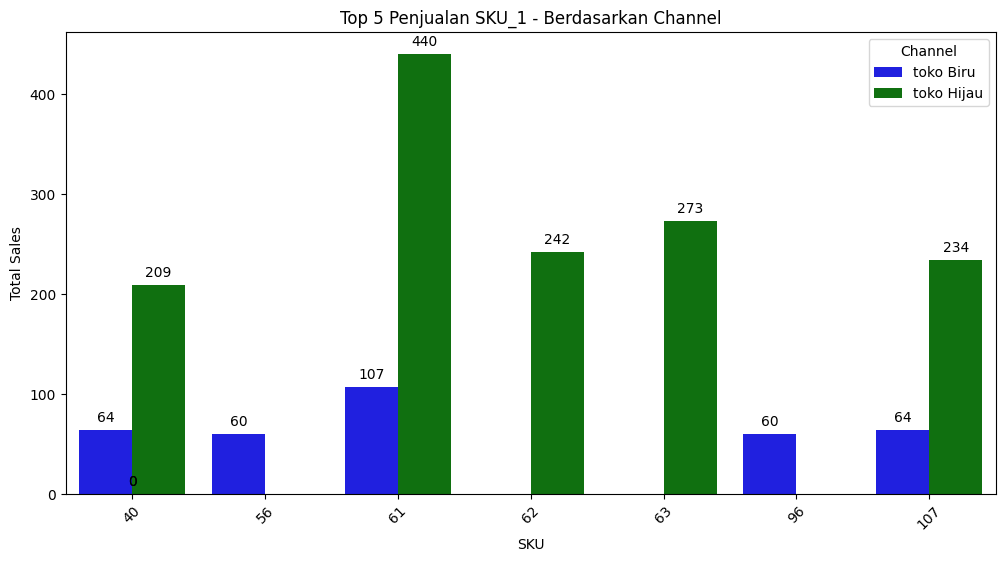

In [ ]:
# Gabung Data Channel 0 dan 1
df_both_channels = pd.concat([df_channel_0, df_channel_1])

# Ubah Data Dulu, Berdasarkan SKU
df_SKU_1_both = df_both_channels.melt(id_vars=['Jumlah', 'Channel'], value_vars=['SKU_1'], var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Jumlahin semua value "Jumlah"
SKU_1_sales_both = df_SKU_1_both.groupby(['SKU', 'Channel'])['Jumlah'].sum().reset_index()

# Ambil top 5 SKU teratas berdasarkan total "jumlah" penjualan untuk masing-masing channel
top_SKU_1_both = SKU_1_sales_both.groupby('Channel').apply(lambda x: x.nlargest(5, 'Jumlah')).reset_index(drop=True)

# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Hijau'}
top_SKU_1_both['Channel_Name'] = top_SKU_1_both['Channel'].map(channel_names)

# Tentukan warna untuk setiap channel
palette = {'toko Biru': 'Blue', 'toko Hijau': 'Green'}

# Plot barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_SKU_1_both, palette=palette)

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Top 5 Penjualan SKU_1 - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


## SKU 2

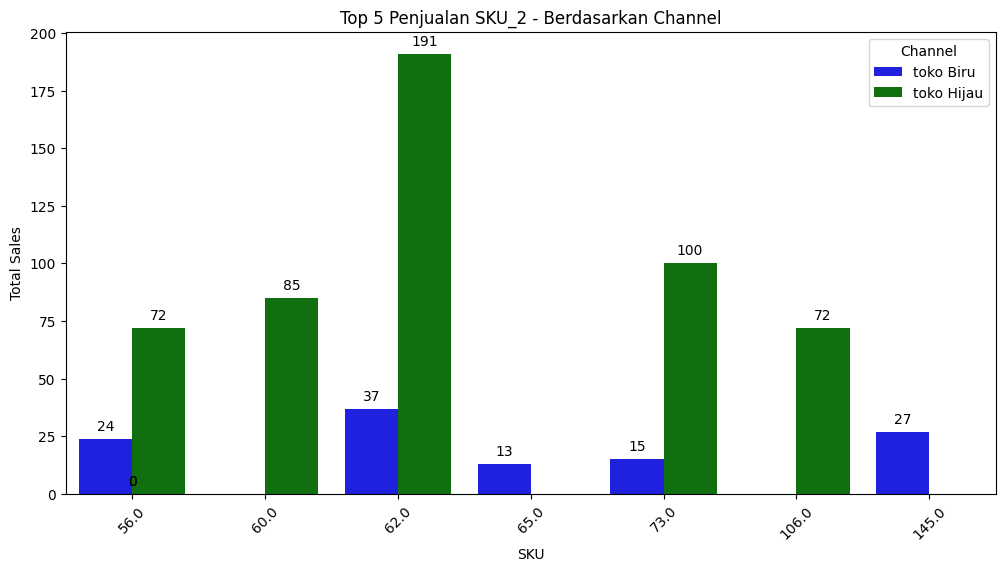

In [ ]:
# Gabung Data Channel 0 dan 1
df_both_channels = pd.concat([df_channel_0, df_channel_1])

# Ubah Data Dulu, Berdasarkan SKU
df_SKU_2_both = df_both_channels.melt(id_vars=['Jumlah', 'Channel'], value_vars=['SKU_2'], var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Jumlahin semua value "Jumlah"
SKU_2_sales_both = df_SKU_2_both.groupby(['SKU', 'Channel'])['Jumlah'].sum().reset_index()

# Ambil top 5 SKU teratas berdasarkan total "jumlah" penjualan untuk masing-masing channel
top_SKU_2_both = SKU_2_sales_both.groupby('Channel').apply(lambda x: x.nlargest(5, 'Jumlah')).reset_index(drop=True)

# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Hijau'}
top_SKU_2_both['Channel_Name'] = top_SKU_2_both['Channel'].map(channel_names)

# Tentukan warna untuk setiap channel
palette = {'toko Biru': 'Blue', 'toko Hijau': 'Green'}

# Plot barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_SKU_2_both, palette=palette)

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Top 5 Penjualan SKU_2 - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


## SKU 3

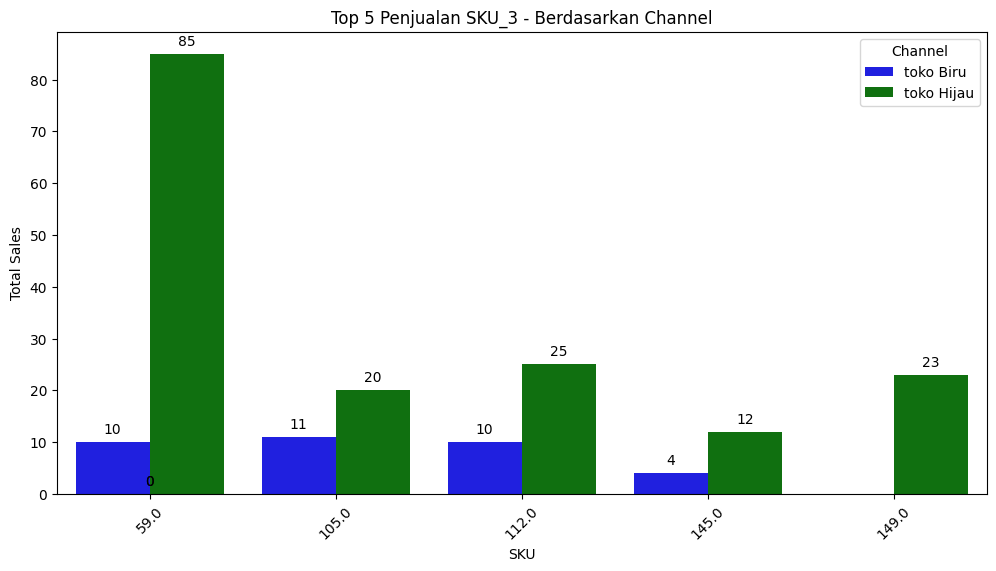

In [ ]:
# Gabung Data Channel 0 dan 1
df_both_channels = pd.concat([df_channel_0, df_channel_1])

# Ubah Data Dulu, Berdasarkan SKU
df_SKU_3_both = df_both_channels.melt(id_vars=['Jumlah', 'Channel'], value_vars=['SKU_3'], var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Jumlahin semua value "Jumlah"
SKU_3_sales_both = df_SKU_3_both.groupby(['SKU', 'Channel'])['Jumlah'].sum().reset_index()

# Ambil top 5 SKU teratas berdasarkan total "jumlah" penjualan untuk masing-masing channel
top_SKU_3_both = SKU_3_sales_both.groupby('Channel').apply(lambda x: x.nlargest(5, 'Jumlah')).reset_index(drop=True)

# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Hijau'}
top_SKU_3_both['Channel_Name'] = top_SKU_3_both['Channel'].map(channel_names)

# Tentukan warna untuk setiap channel
palette = {'toko Biru': 'Blue', 'toko Hijau': 'Green'}

# Plot barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_SKU_3_both, palette=palette)

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Top 5 Penjualan SKU_3 - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


## SKU 4

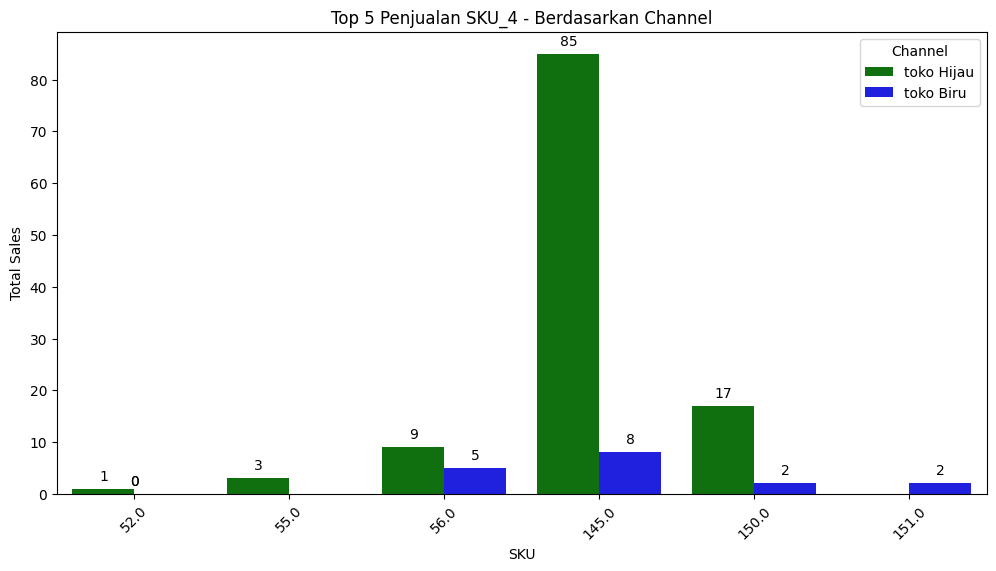

In [ ]:
# Gabung Data Channel 0 dan 1
df_both_channels = pd.concat([df_channel_0, df_channel_1])

# Ubah Data Dulu, Berdasarkan SKU
df_SKU_4_both = df_both_channels.melt(id_vars=['Jumlah', 'Channel'], value_vars=['SKU_4'], var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Jumlahin semua value "Jumlah"
SKU_4_sales_both = df_SKU_4_both.groupby(['SKU', 'Channel'])['Jumlah'].sum().reset_index()

# Ambil top 5 SKU teratas berdasarkan total "jumlah" penjualan untuk masing-masing channel
top_SKU_4_both = SKU_4_sales_both.groupby('Channel').apply(lambda x: x.nlargest(5, 'Jumlah')).reset_index(drop=True)

# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Hijau'}
top_SKU_4_both['Channel_Name'] = top_SKU_4_both['Channel'].map(channel_names)

# Tentukan warna untuk setiap channel
palette = {'toko Biru': 'Blue', 'toko Hijau': 'Green'}

# Plot barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_SKU_4_both, palette=palette)

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Top 5 Penjualan SKU_4 - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


## SKU 5

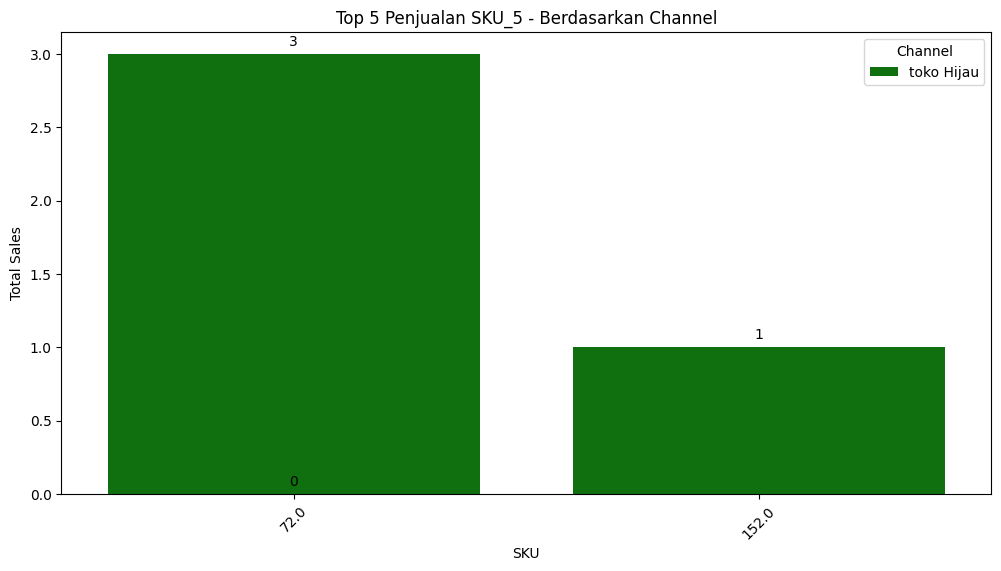

In [ ]:
# Gabung Data Channel 0 dan 1
df_both_channels = pd.concat([df_channel_0, df_channel_1])

# Ubah Data Dulu, Berdasarkan SKU
df_SKU_5_both = df_both_channels.melt(id_vars=['Jumlah', 'Channel'], value_vars=['SKU_5'], var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Jumlahin semua value "Jumlah"
SKU_5_sales_both = df_SKU_5_both.groupby(['SKU', 'Channel'])['Jumlah'].sum().reset_index()

# Ambil top 5 SKU teratas berdasarkan total "jumlah" penjualan untuk masing-masing channel
top_SKU_5_both = SKU_5_sales_both.groupby('Channel').apply(lambda x: x.nlargest(5, 'Jumlah')).reset_index(drop=True)

# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Hijau'}
top_SKU_5_both['Channel_Name'] = top_SKU_5_both['Channel'].map(channel_names)

# Tentukan warna untuk setiap channel
palette = {'toko Biru': 'Blue', 'toko Hijau': 'Green'}

# Plot barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_SKU_5_both, palette=palette)

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Top 5 Penjualan SKU_5 - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


## SKU 6

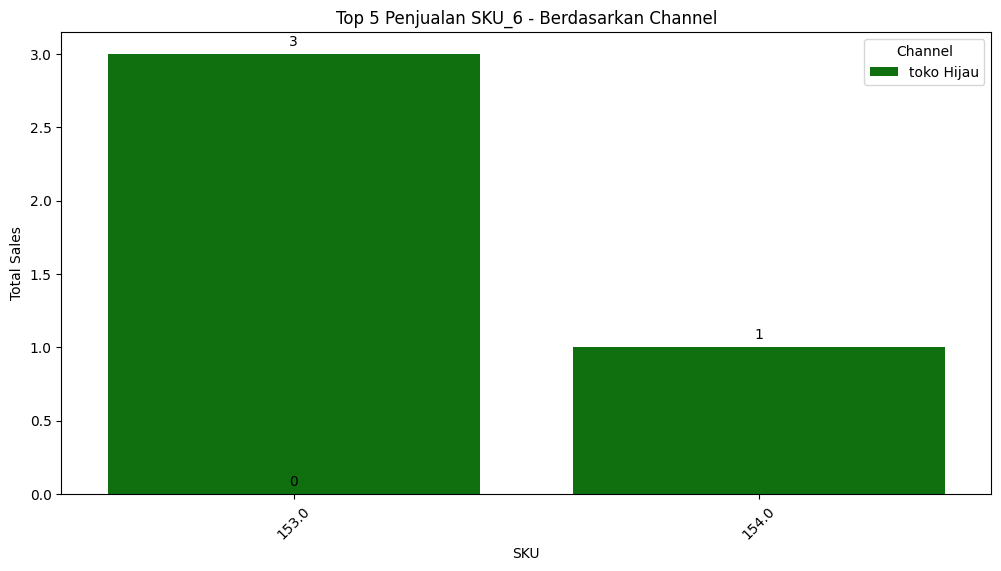

In [ ]:
# Gabung Data Channel 0 dan 1
df_both_channels = pd.concat([df_channel_0, df_channel_1])

# Ubah Data Dulu, Berdasarkan SKU
df_SKU_6_both = df_both_channels.melt(id_vars=['Jumlah', 'Channel'], value_vars=['SKU_6'], var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Jumlahin semua value "Jumlah"
SKU_6_sales_both = df_SKU_6_both.groupby(['SKU', 'Channel'])['Jumlah'].sum().reset_index()

# Ambil top 5 SKU teratas berdasarkan total "jumlah" penjualan untuk masing-masing channel
top_SKU_6_both = SKU_6_sales_both.groupby('Channel').apply(lambda x: x.nlargest(5, 'Jumlah')).reset_index(drop=True)

# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Hijau'}
top_SKU_6_both['Channel_Name'] = top_SKU_6_both['Channel'].map(channel_names)

# Tentukan warna untuk setiap channel
palette = {'toko Biru': 'Blue', 'toko Hijau': 'Green'}

# Plot barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_SKU_6_both, palette=palette)

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Top 5 Penjualan SKU_6 - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


## ALL TOP 5 SKU

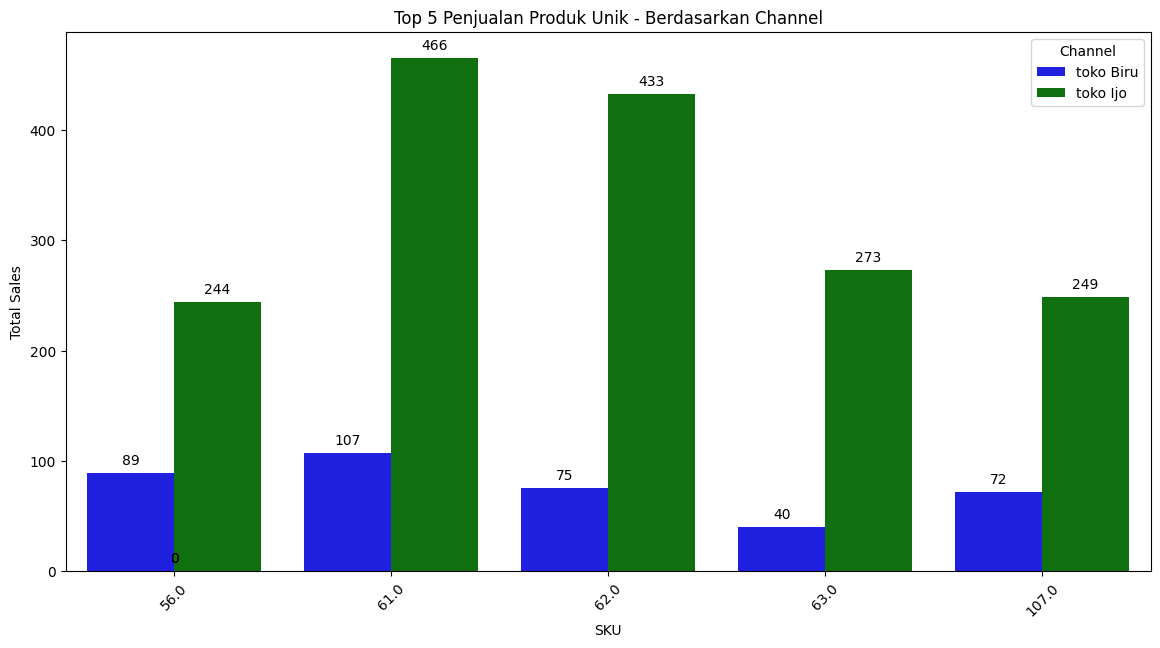

In [ ]:
# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Ijo'}
df['Channel_Name'] = df['Channel'].map(channel_names)

# Gabungkan semua SKU menjadi satu kolom
sku_columns = ['SKU_1', 'SKU_2', 'SKU_3', 'SKU_4', 'SKU_5', 'SKU_6']
df_melted = df.melt(id_vars=['Channel', 'Jumlah', 'Channel_Name'], value_vars=sku_columns, var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Group by SKU dan Channel_Name, dan hitung total penjualan
total_sales = df_melted.groupby(['SKU', 'Channel_Name'])['Jumlah'].sum().reset_index()

# Identifikasi top 5 produk unik berdasarkan jumlah total penjualan
top_sku = total_sales.groupby('SKU')['Jumlah'].sum().nlargest(5).index
top_sku_sales = total_sales[total_sales['SKU'].isin(top_sku)]

# Plot barplot
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_sku_sales, palette={'toko Biru': 'Blue', 'toko Ijo': 'Green'})

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('Top 5 Penjualan Produk Unik - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()

## Sebaran Penjualan top 5 produk pada setiap toko

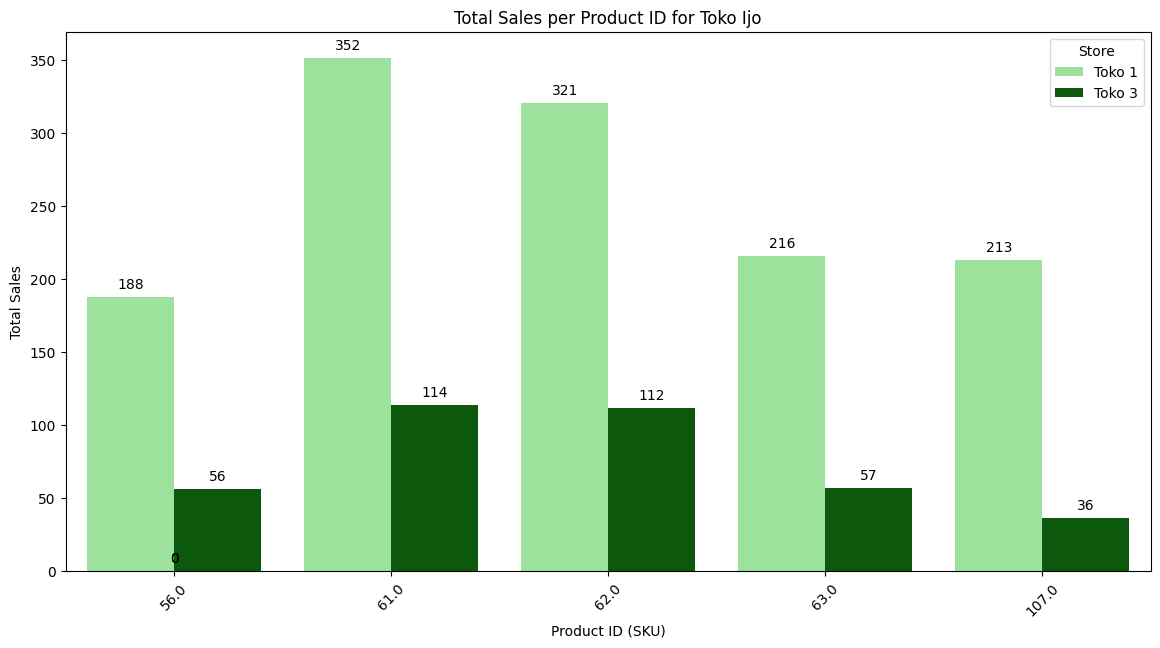

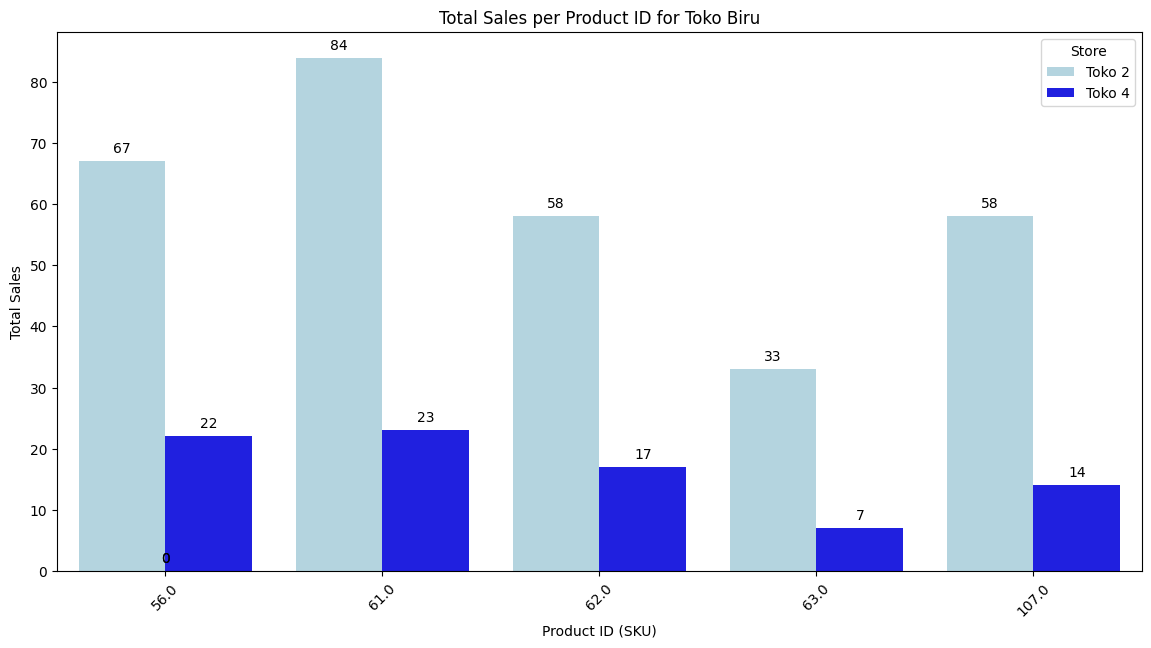

In [ ]:
# Mapping for better readability
channel_names = {0: 'Toko Biru', 1: 'Toko Ijo'}
store_names = {0: 'Toko 1', 1: 'Toko 2', 2: 'Toko 3', 3: 'Toko 4', 4: 'Toko 5'}

df['Channel_Name'] = df['Channel'].map(channel_names)
df['Store_Name'] = df['Nama Toko'].map(store_names)

# Filter data for each channel
df_ijo = df[df['Channel_Name'] == 'Toko Ijo']
df_biru = df[df['Channel_Name'] == 'Toko Biru']

# Filter data for specific stores in each channel
df_ijo_filtered = df_ijo[df_ijo['Nama Toko'].isin([0, 2])]  # Toko 1 and Toko 3
df_biru_filtered = df_biru[df_biru['Nama Toko'].isin([1,3,4])]

# Melt data to get SKU in one column
sku_columns = ['SKU_1', 'SKU_2', 'SKU_3', 'SKU_4', 'SKU_5', 'SKU_6']
df_melted_ijo = df_ijo_filtered.melt(id_vars=['Jumlah', 'Store_Name'], value_vars=sku_columns, var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])
df_melted_biru = df_biru_filtered.melt(id_vars=['Jumlah', 'Store_Name'], value_vars=sku_columns, var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Filter for specific product IDs
product_ids = [56, 61, 62, 63, 107]
df_melted_ijo = df_melted_ijo[df_melted_ijo['SKU'].isin(product_ids)]
df_melted_biru = df_melted_biru[df_melted_biru['SKU'].isin(product_ids)]

# Group by SKU and Store_Name to get total sales
total_sales_ijo = df_melted_ijo.groupby(['SKU', 'Store_Name'])['Jumlah'].sum().reset_index()
total_sales_biru = df_melted_biru.groupby(['SKU', 'Store_Name'])['Jumlah'].sum().reset_index()
palette_toko_ijo = ['lightgreen', 'darkgreen']
# Plot for Toko Ijo
plt.figure(figsize=(14, 7))
ax_ijo = sns.barplot(x='SKU', y='Jumlah', hue='Store_Name', data=total_sales_ijo, palette=palette_toko_ijo)
for p in ax_ijo.patches:
    ax_ijo.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')
plt.title('Total Sales per Product ID for Toko Ijo')
plt.xlabel('Product ID (SKU)')
plt.ylabel('Total Sales')
plt.legend(title='Store')
plt.xticks(rotation=45)
plt.show()

# Plot for Toko Biru
palette_toko_biru = ['lightblue', 'blue']
plt.figure(figsize=(14, 7))
ax_biru = sns.barplot(x='SKU', y='Jumlah', hue='Store_Name', data=total_sales_biru, palette=palette_toko_biru)
for p in ax_biru.patches:
    ax_biru.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.title('Total Sales per Product ID for Toko Biru')
plt.xlabel('Product ID (SKU)')
plt.ylabel('Total Sales')
plt.legend(title='Store')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# # Filter data untuk Nama Toko yang nilai nya 4
# df_toko_5 = df[df['Nama Toko'] == 4]

# # Combine all SKUs into one column
# sku_columns = ['SKU_1', 'SKU_2', 'SKU_3', 'SKU_4', 'SKU_5', 'SKU_6']
# df_toko_5_melted = df_toko_5.melt(id_vars=['Nama Toko', 'Jumlah'], value_vars=sku_columns, var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# # Group by SKU and count the total sales
# df_sku_count = df_toko_5_melted.groupby('SKU')['Jumlah'].sum().reset_index()

# # Display the result
# print(df_sku_count)


1. Kinerja Bulanan dan Mingguan:

- Maret 2024: Bulan Maret menunjukkan lonjakan pendapatan yang signifikan dibandingkan dengan bulan-bulan lainnya, terutama pada Toko Hijau. Puncak penjualan terjadi pada minggu ke-5, dengan total pendapatan mencapai Rp. 106.777.653. Toko Hijau berkontribusi sekitar 70% dari pendapatan tersebut.
Penjualan Tertinggi: Penjualan tertinggi terjadi pada Sabtu, 2 Maret 2024, dengan pendapatan Rp. 25.515.242, di mana Toko Biru menyumbang hampir 80% dari pendapatan hari itu.
Penjualan Terendah: Penjualan terendah terjadi pada Jumat, 8 Maret 2024, dengan total penjualan di bawah Rp. 3.038.301.

2. Analisis Harian dan Pola Penjualan:

- Februari 2024: Penjualan tertinggi terjadi pada Kamis, 29 Februari 2024, dengan penjualan mencapai lebih dari Rp. 12.681.442. Penjualan terendah pada Jumat, 23 Februari 2024, dengan total penjualan Rp. 3.898.784.
April 2024: Angka penjualan tertinggi terjadi pada Kamis, 4 April 2024, dengan total penjualan lebih dari Rp. 26.294.129. Penjualan terendah terjadi pada Minggu, 7 April 2024, dengan hampir tidak ada pendapatan.

3. Faktor Penentu Penjualan:

- Permintaan Suplemen: Lonjakan penjualan di Maret kemungkinan disebabkan oleh permintaan suplemen yang tinggi menjelang masa mudik lebaran dan keterlambatan pengiriman.
Tanggal Cantik dan Promo: Penjualan tinggi pada tanggal-tanggal tertentu (misalnya 3-3 dan 4-4) dipengaruhi oleh promo besar dari marketplace.
Keterlambatan Gaji: Penurunan penjualan pada minggu ke-4 Februari 2024 kemungkinan karena gaji belum cair, sehingga daya beli menurun.

4. Pola Belanja Pelanggan:

- Waktu Belanja: Rata-rata pelanggan melakukan checkout antara jam 09.01 hingga 12.00, dengan lonjakan belanja antara jam 06.01 hingga 15.00. Pelanggan Toko Biru cenderung berbelanja pada siang hari, sedangkan pelanggan Toko Hijau lebih aktif pada pagi hari.
Pendapatan Harian: Toko Biru mencatat pendapatan rata-rata tertinggi pada rentang waktu 12.01 – 15.00, sementara Toko Hijau mencatat pendapatan tertinggi pada rentang waktu 06.01 – 09.00.

5. Analisis Efisiensi Pengiriman:

- Pengaruh Mudik Lebaran: Peningkatan penjualan pada minggu tertentu dipengaruhi oleh kebutuhan pelanggan untuk suplemen menjelang mudik lebaran dan adanya promo besar dari marketplace.
Keterlambatan Pengiriman: Menjelang lebaran, keterlambatan pengiriman juga berpengaruh pada lonjakan penjualan, karena pelanggan ingin memastikan mereka menerima barang sebelum libur panjang.
Secara keseluruhan, visualisasi data menunjukkan bahwa faktor musiman, promo, waktu gajian, dan kebiasaan belanja pelanggan memainkan peran penting dalam fluktuasi penjualan di kedua toko ini. Toko Hijau secara konsisten menunjukkan performa lebih baik dibandingkan Toko Biru, meskipun memiliki jumlah toko yang lebih sedikit.